# Part II Image Transformation
For this part you are required to write some functions for interpolation and transformation.


In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math

Please load the example2.png.

In [2]:
# if you are using Google Colab, please use the below codes to load image
#from google.colab import files
#from io import BytesIO
#uploaded = files.upload()
#img = Image.open(BytesIO(uploaded['example2.png']))

In [2]:
# if you are using local jupyter notebook, please use the below codes to load image
img = Image.open('example2.png')

height: 512  width:  512


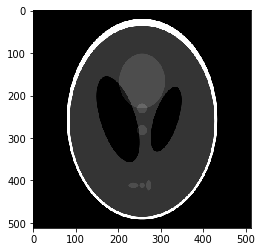

In [3]:
# change the image into a gray image 
img = img.convert('L')
h,w = np.shape(img)
print('height:',h,' width: ',w)
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

## Question1: Bilinear Interpolation
Here you need to implement a function for bilinear interpolation from scratch.
Xq and Yq are arrays of coordinates of the points we want to interpolate. 

For example, Xq=[0.5, 1.2], Yq=[0.8, 1.9] indicate that we want to interpolate the points (0.5, 0.8) and (1.2, 1.9).

The output should be a list of interpolation result.

0
<class 'int'>
-------
70.1
71 70
1
52
<class 'int'>
-------
189.5
190 189
1
0
[52.  0.]


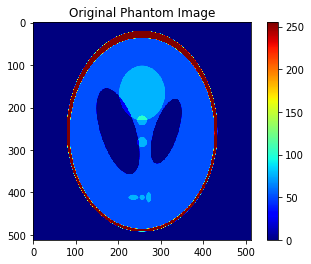

In [13]:
def interp2(pil_img, Xq, Yq):
    image = np.array(pil_img)
    print(str(image[5,5]))
    plt.figure()
    plt.imshow(image,cmap='jet')
    plt.colorbar()
    plt.title('Original Phantom Image')
    
    
    interp_intensity = np.zeros((len(Xq)))

    for ii in range(0,len(Xq)):
        x = Xq[ii]
        y = Yq[ii]
        x1 = int(np.floor(x))
        print(type(x1))
        x2 = int(np.ceil(x))
        y1 = int(np.floor(y))
        y2 = int(np.ceil(y))
        
        #corners values with image intensities
        Q11 = image[y1,x1]
        Q12 = image[y1,x2]
        Q21 = image[y2,x1]
        Q22 = image[y2,x2]
        
        r1 = ((x2 - x)/(x2 - x1)) * Q11 + ((x - x1)/(x2 - x1))*Q21
        r2 = ((x2 - x)/(x2 - x1)) * Q12 + ((x - x1)/(x2 - x1))*Q22
        
        print('-------')
        print(y)
        print(y2,y1)
        print(y2-y1)
        print(Q11)
        interp_intensity[ii] = ((y2 - y)/(y2 - y1))*r1 + ((y - y1)/(y2 - y1))*r2

#R1 = ((x2 – x)/(x2 – x1))*Q11 + ((x – x1)/(x2 – x1))*Q21

#R2 = ((x2 – x)/(x2 – x1))*Q12 + ((x – x1)/(x2 – x1))*Q22
    
        interp_points = interp_intensity
    return interp_points

Xq=[254.1, 200.8]
Yq=[70.1, 189.5] 

img.size
out = interp2(img,Xq,Yq)
print(out)



## Question 2: Write a function that creates a 2D affine transformation matrix in homogenous and its inverse from a sequence of elementary transformations

The input is a list of operation name and its parameters. The operation is restricted to {rotation, shear, shift, scaling}.

For example, [('scaling', 1.2), ('shift', [10 20]), ('scaling', .2), ('rotation', 90)]

Your return should be the composed affine matrix, and its inverse.

In [14]:
from numpy.linalg import inv
import math

def rotate(theta):
    M = np.zeros((3,3))
    c = np.cos(theta)
    s = np.sin(theta)
    
    M = [(c,-s,0),(s,c,0),(0,0,1)]
    print(M)
    return M

def scaling(sx,sy):
    M = np.zeros((3,3))
    M = [(sx,0,0),(0,sy,0),(0,0,1)]
    print(M)
    return M[:]

def shearx(shx):
    M = np.zeros((3,3))
    M = [(1,shx,0),(0,1,0),(0,0,1)]
    print(M)
    return M

def shift(tx,ty):
    M = np.zeros((3,3))
    M = [(1,0,tx),(0,1,ty),(0,0,1)]
    print(M)
    return M

def get_affine_matrix(op_list):
    '''
    Write your own code here.
    '''
    affine_matrix = 0
    iaffine_matrix = 0
    
    command_list = []
    arg_list = []
    M_train = []
    
    #op_list will need to match the type of transform and its change
    
    
    #scan op_list for the type of transform
    print(len(op_list))
    print(len(op_list[0]))
    for ii in range(0,len(op_list)):
        #print(op_list[0][0])
        #command = upper(op_list[ii][0])
        #convert 1st element in list to uppercase 
        command = op_list[ii][0].upper()
        arg_values = op_list[ii][1:]
        print("command is ",command)
        print("arguments are",str(arg_values))
        if(command == 'SCALING'):
            print('Found SCALING')
            command_list.append('SCALING')
            arg_list.append(arg_values)
            print(arg_values)
            M_train.append(scaling(arg_values[0],arg_values[1]))
        elif(command == 'SHIFT'):
            print('Found SHIFT')
            command_list.append('SHIFT')
            arg_list.append([arg_values])
            M_train.append(shift(arg_values[0],arg_values[1]))
        elif (command == 'ROTATE'):
            print('Found ROTATE')
            command_list.append('ROTATE')
            arg_list.append([arg_values])
            M_train.append(rotate(arg_values[0]))
        elif (command == 'TRANSLATE'):
            print('Found TRANSLATE')
            command_list.append('TRANSLATE')
            arg_list.append([arg_values])
        elif (command == 'SHEAR'):
            print('Found SHEAR')
            command_list.append('SHEAR')
            arg_list.append([arg_values])
            M_train.append(shear(arg_values[0],arg_values[1]))
        else:
            
            print("Did not find a valid command")
            return
    
    print('command list is ',command_list)
    print('arg list is',arg_list)
    print('M_train is',M_train)
    print('shape of M_train is ', np.shape(M_train))
    
    #Now that we have the separate commands and the arguments for each, generate those
    #transform matrices
    
    
    
    #a = translation(2,1)
    #b=scaling(5,7)
    #rotation(45)
    #shearx(10)

    #np.dot(a,b)
    affine_matrix = M_train
    return affine_matrix, iaffine_matrix

output_train = get_affine_matrix([('scaling',1.2,5),('rotate',15.0),('shift',5,8)])
print('Affine output shape is',np.shape(output_train))
print('Affine matrix is ',output_train[0])

3
3
command is  SCALING
arguments are (1.2, 5)
Found SCALING
(1.2, 5)
[(1.2, 0, 0), (0, 5, 0), (0, 0, 1)]
command is  ROTATE
arguments are (15.0,)
Found ROTATE
[(-0.7596879128588213, -0.6502878401571168, 0), (0.6502878401571168, -0.7596879128588213, 0), (0, 0, 1)]
command is  SHIFT
arguments are (5, 8)
Found SHIFT
[(1, 0, 5), (0, 1, 8), (0, 0, 1)]
command list is  ['SCALING', 'ROTATE', 'SHIFT']
arg list is [(1.2, 5), [(15.0,)], [(5, 8)]]
M_train is [[(1.2, 0, 0), (0, 5, 0), (0, 0, 1)], [(-0.7596879128588213, -0.6502878401571168, 0), (0.6502878401571168, -0.7596879128588213, 0), (0, 0, 1)], [(1, 0, 5), (0, 1, 8), (0, 0, 1)]]
shape of M_train is  (3, 3, 3)
Affine output shape is (2,)
Affine matrix is  [[(1.2, 0, 0), (0, 5, 0), (0, 0, 1)], [(-0.7596879128588213, -0.6502878401571168, 0), (0.6502878401571168, -0.7596879128588213, 0), (0, 0, 1)], [(1, 0, 5), (0, 1, 8), (0, 0, 1)]]


## Question 3: Based on the below two functions, write a code to achieve the operation of rotation and scaling.

Here you need to write a transformation function which takes the input, affine matrix, iaffine matrix and new shape of your output image. We will compare your transformation result with the functions provided by PIL after a rotation and scaling.

The return should be a 2d matrix of of the result of transforming an image.

T:  img type is  <class 'numpy.ndarray'>
-----img array from PIL is  (512, 512)
1
3
command is  SCALING
arguments are (1.2, 5)
Found SCALING
(1.2, 5)
[(1.2, 0, 0), (0, 5, 0), (0, 0, 1)]
command list is  ['SCALING']
arg list is [(1.2, 5)]
M_train is [[(1.2, 0, 0), (0, 5, 0), (0, 0, 1)]]
shape of M_train is  (1, 3, 3)
1
3
command is  SCALING
arguments are (1.2, 5)
Found SCALING
(1.2, 5)
[(1.2, 0, 0), (0, 5, 0), (0, 0, 1)]
command list is  ['SCALING']
arg list is [(1.2, 5)]
M_train is [[(1.2, 0, 0), (0, 5, 0), (0, 0, 1)]]
shape of M_train is  (1, 3, 3)
T:  new img shape is (512, 512)
[[(1.2, 0, 0), (0, 5, 0), (0, 0, 1)]]
T:  affine shape is (3, 3)
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  230
img val is  170
img val is  111
img val is  51
img val is  2
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  35
img val is  136
img val is  228
img val is  255
img val is  255
img val is  255
img val is  255
img val

img val is  229
img val is  123
img val is  18
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
i

img val is  255
img val is  255
img val is  255
img val is  255
img val is  254
img val is  187
img val is  77
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  26
img val is  153
img val is  250
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  42
img val is  190
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  86
img val is  159
img val is  233
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  36
img val is  207
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img v

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  243
img val is  147
img val is  62
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img v

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  2
img val is  145
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
im

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  237
img val is  116
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  91
img val is  226
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  1
img val is  151
img val is  255
img val is  255
img val is  255
img val is  

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  81
img val is  224
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  210
img val is  19
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  58
img val is  247
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  245
img val is  107
img val is  52
img val is  52
img val is  52
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  120
img val is  251
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  210
img val is  14
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  127
img val is  253
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  254
img val is  83
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  95
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  224
img val is  70
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
im

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  79
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  201
img val is  56
img val is  52
img val is  52
img val is  52

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  136
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  139
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  81
img val is  245
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  217
img val is  9
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  250
img val is  93
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  61
img val is  74
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  124
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  198
img val is  1
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
i

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  71
img val is  53
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  85
img val is  251
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  69
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  86
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  225
img val is  57
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  5

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  97
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  194
img val is  52
img val is  52
img val is  52
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  171
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  107
img val is  0
img val is  0

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  3
img val is  219
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  236
img val is  61
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  5

img val is  226
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  220
img val is  4
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  54
img val is  76
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  102
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  80
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  192
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  194
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  72
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  8
img val is  233
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  253
img val is  81
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
im

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  80
img val is  252
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  224
img val is  3
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  55
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  72
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  69
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  106
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  244
img val is  63
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  69
img val is  249
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  84
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  54
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  88
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  190
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
i

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  209
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  54
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val 

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  75
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  123
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  51
img val is  13
img val is  0
img val is  0
img val is  0
img v

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  148
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  60
img val is  0
img val is  0
img val is  0
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  79
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  112
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
im

img val is  55
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  107
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  39
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  172
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  172
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  48
img val is  1
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  31
img val is  28
img val is  67
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  17
img val is  26
img val is  26
img val is  26
img val is  47
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
im

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  27
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  18
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  12
img val is  26
img val is  26
img val is  26
img val is  26
img val is  26
img val is  28
img val is  67
img val is  77
img val is  77
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  76
img val is  53
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  31
img val is  1
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  4
img val is  50
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img va

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  253
img val is  66
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  39
img val is  0
img val is  0
img val is  0
img v

img val is  52
img val is  52
img val is  32
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  40
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  25
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  159
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  247
img val is  6
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  16
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  26
img val is  26
img val is  26
img val is  26
img val is  26
img val is  26
img val is  26
img val is  26
img val is  33
img val is  76
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  202
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  159
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img v

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  126
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img 

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  168
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  154
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52


img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  215
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  93
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is

img val is  26
img val is  26
img val is  26
img val is  26
img val is  26
img val is  27
img val is  69
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  72
img val is  53
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  49
img val is  4
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  210
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  74
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  50
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
im

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  1
img val is  28
img val is  26
img val is  26
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  126
img val is  255
img val is  255


img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  12
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52


img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  23
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  103
img val is  90
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  76
img val is  65
img val is  54
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  25
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img v

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  75
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  113
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  189
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  235
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img v

img val is  52
img val is  64
img val is  77
img val is  77
img val is  77
img val is  79
img val is  79
img val is  82
img val is  85
img val is  89
img val is  93
img val is  93
img val is  93
img val is  93
img val is  93
img val is  93
img val is  91
img val is  88
img val is  84
img val is  81
img val is  78
img val is  76
img val is  77
img val is  77
img val is  77
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  17
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  194
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  218
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  39
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  20
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  1
img val is  48
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  67
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  75
img val is  56
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  187
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  178
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  45
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  54
img val is  67
img val is  75
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  72
img val is  61
img val is  53
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
im

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  43
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  123
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  213
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  5

img val is  26
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  18
img val is  52
img val is  52
img val is  52
im

img val is  255
img val is  255
img val is  23
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  23
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  23
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  22
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  2
img val is  50
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52


img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  234
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  19
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  49
img val is  1
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val i

img val is  255
img val is  255
img val is  255
img val is  155
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  253
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  249
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  49
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  59
img val is  64
img val is  67
img val is  67
img val is  64
img val is  62
img val is  55
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  43
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0


img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  76
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  178
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  5
img val is  0
img val is  

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  112
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  134
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  28
img val is  26
img val is  41
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  64
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  18
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0


img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  195
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  63
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  24
img val is  26
img val is  26
img val is  26
img val is  69
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  54
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  47
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0


img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  124
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  98
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  13
img val is  26
img val is  26
img val is  26
img val is  76
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  72
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  7
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
im

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  44
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  9
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0


img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  201
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  226
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  46
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  4
img val is  50
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  108
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  88
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  5

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  15
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  30
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  39
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  36
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  129
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  27
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  12
img val is  51
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  172
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  212
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
i

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  150
img val i

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  49
img val is  6
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  209
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  182
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
im

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  12
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  26
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  19
img val is  51
img val is  5

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  65
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  89
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  41
img val is  3
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  19
img val is  49
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  125
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  243
img val is  54
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img v

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  191
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  195
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  46
img val is  4
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  97
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  253
img val is  68
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  222
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  156
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img

img val is  52
img val is  52
img val is  41
img val is  3
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  18
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  1
img val is  228
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  11
img val is  247
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  146
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
im

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  98
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  65
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
im

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  57
img val is  241
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  141
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  46
img val is  25
img val is  4
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  14
img val is  40
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  146
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  243
img val is  60
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  164
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  236
img val is  55
img v

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  51
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  134
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  21
img val is  247
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  170
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  194
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  240
img val is  62
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
i

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  59
img val is  237
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  204
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  245
img val is  70
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  201
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  254
img val is  52
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  168
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  141
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img 

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  152
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  152
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  55
img val is  55
img val is  55
img val is  55
img val is  55
img val is  53
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  53
img val is  55
img val is  55
img val is  54
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  60
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  77
img val is  67
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  165
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  183
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  54
img val is  210
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  134
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  2
img val is  193
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  196
img val is  53
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  77
img val is  77
img val is  76
img val is  53
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  63
img val is  223
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  226
img val is  17
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0


img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  62
img val is  217
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  240
img val is  37
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0


img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  206
img val is  58
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
im

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  72
img val is  225
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  206
img val is  13
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  98
img val is  254
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  253
img val is  127
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  5

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  119
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  234
img val is  92
img val is  5

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  1
img val is  128
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  230
img val is  95
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  96
img val is  214
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  237
img val is  85
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  52
img val is  55
img val is  112
img val is  187
img val is  251
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  195
img val is  60
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  2
img val is  60
img val is  153
img val is  244
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  250
img val is  221
img val is  187
img val is  153
img val is  112
img val is  79
img val is  53
i

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  17
img val is  85
img val is  162
img val is  239
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val is  255
img val 

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img val is  0
img va

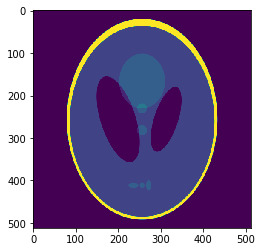

In [16]:
# write the code for transform function
def transform(img, affine, iaffine, new_shape):
    '''
    Write your own code here.
    '''
    img = np.array(img)
    print("T:  new img shape is",img.shape)
    print(affine)
    print('T:  affine shape is',np.shape(affine[0]))
    a = np.array((1,3))
    rval = np.array((512,3))
    for row in range(512): 
        for col in range(512):
            
            print('img val is ',img[row,col])
            #print('size of a is',np.shape(a))
            #print('size of affine is ',np.shape(affine[0]))
            a = [row,col,1]
            #print('a values are ',a)
            [xp,yp,b]= np.dot(a,affine[0]) #[img[row,col],1] * affine
            
    #out = get_affine_matrix([('scaling',1.2,5),('rotate',15.0),('shift',5,8)])
    #img= img * affine
    return img

print('T:  img type is ',type(img))
old_img = img
img = np.asarray(img)
print('-----img array from PIL is ',np.shape(img))
new_img=transform(img,
                  get_affine_matrix([('scaling',1.2,5)])[0],
                  get_affine_matrix([('scaling',1.2,5)])[1],
                  [512,512])

plt.figure()
plt.imshow(new_img)

In [8]:
test = np.zeros((3,3))
print(np.shape(test))

a = (img[256,256],0)
print('a is ', a)

(3, 3)
a is  (52, 0)


Now we will check if your result compared with the functions from PIL. You will get full credit if you can have a similar output.

In [9]:
# show the standard transformation result
theta = 118
scaling_rate = 0.5
standard_img = (img.rotate(theta)).resize((int(h*scaling_rate), int(w*scaling_rate)))
plt.figure()
plt.imshow(standard_img, cmap='gray')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'rotate'

In [ ]:
# show your transformation result

# get the shape of the output
new_shape = (np.array(np.shape(img))*scaling_rate).astype(int)
h, w = np.shape(img)
# get the related affine matrix
affine, iaffine = get_affine_matrix([('shift', [-w/2, -h/2]),('rotation',theta), ('shift', [w/2, h/2]), ('scaling', scaling_rate)])
# transform the image
transfered_img = transform(np.array(img), affine, iaffine, new_shape)
plt.figure()
plt.imshow(transfered_img, cmap='gray')
plt.show()

# Bonus: Write a solver function that retrieves the affine transformation (in terms of a sequence of elementary transformations) between two provided images (depicting the same object transformed by an affine transformation). Justify your approach and comment on the limitations.

In [ ]:
# generate the random transformation
random_theta = np.random.random()*180
random_scaling = np.random.random()*0.5 + 0.5
random_shift_x = (np.random.random()-0.5)*w*0.1
random_shift_y = (np.random.random()-0.5)*h*0.1

# get the random transformed image
random_shape = (np.array(np.shape(img))*random_scaling).astype(int)
# affine, iaffine = get_affine_matrix([('rotation', random_theta), ('scaling', random_scaling), ('shift', [random_shift_x, random_shift_y])])
affine, iaffine = get_affine_matrix([('shift', [-w/2, -h/2]),('rotation',theta), ('shift', [w/2, h/2]), ('scaling', random_scaling), ('shift', [random_shift_x, random_shift_y])])
random_transformed_img = transform(np.array(img), affine, iaffine, random_shape)

# show the image
plt.figure()
plt.imshow(random_transformed_img, cmap='gray')
plt.show()

# show the affine matrix
print(affine)

Now write your own code to get the affine matrix based on the original image and random transformed image. And give a description of your method and result.

In [ ]:
def solver(img, random_transformed_img):
  return affine_matrix